In [1]:
import pandas as pd 
import os

from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset

import torch
import torch.nn.functional as F

import seaborn as sns

from datasets import load_dataset, load_from_disk
import dtale

from datasets import load_dataset
from collections import Counter

In [2]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B")

# Oat Dr.GRPO

In [14]:
path = "/home/al2644/research/codebase/reasoning/SmallScaleRL/datasets/parquet/math_12k.parquet"
df = pd.read_parquet(path)

In [23]:
data = df.sample(n=1).iloc[0]

# OpenR1

In [42]:
openr1_220k = load_dataset("open-r1/OpenR1-Math-220k", "default")['train']

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
filtered_openr1 = openr1_220k['train'].filter(lambda x: len(x['correctness_math_verify']) == x['correctness_count'])

Filter:   0%|          | 0/93733 [00:00<?, ? examples/s]

In [15]:
source_counts = Counter(filtered_openr1['source'])

In [16]:
source_counts

Counter({'olympiads': 49615,
         'cn_contest': 9509,
         'aops_forum': 5805,
         'amc_aime': 2155,
         'inequalities': 591,
         'olympiads_ref': 467,
         'number_theory': 231})

In [49]:
sum(openr1_220k[0]['correctness_math_verify']) > 0

True

# BigMath Verified

In [25]:
bigmath = load_dataset("SynthLabsAI/Big-Math-RL-Verified")

In [28]:
bigmath_sources = Counter(bigmath['train']['source'])
bigmath_sources

Counter({'orca_math': 83215,
         'cn_k12': 63609,
         'big_math': 47010,
         'olympiads': 33485,
         'math': 8963,
         'aops_forum': 5740,
         'harp': 2996,
         'omnimath': 2478,
         'gsm8k': 1865,
         'openmath': 1683,
         'amc_aime': 78})

In [32]:
bigmath = bigmath['train'].filter(lambda x: x['problem'] in problem_set, num_proc=4)

Filter (num_proc=4):   0%|          | 0/251122 [00:00<?, ? examples/s]

Traceback (most recent call last):
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/managers.py", line 591, in _run_server
    server.serve_forever()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/managers.py", line 184, in serve_forever
    sys.exit(0)
SystemExit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/util.py", line 224, in __call__
    res = self._

<Axes: ylabel='Count'>

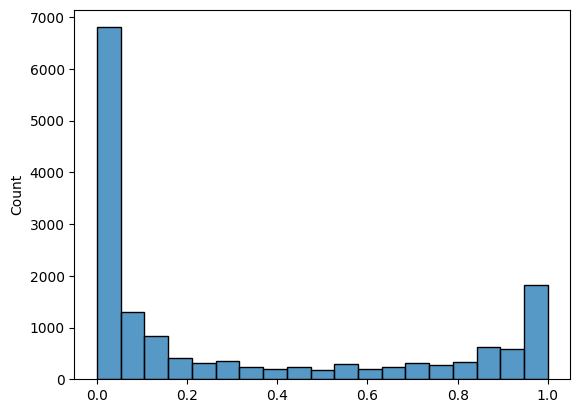

In [37]:
sns.histplot(bigmath['llama8b_solve_rate'])

# MATH

In [155]:
math = load_from_disk("/share/goyal/lio/reasoning/data/hendrycks_math/dataset/")

In [212]:
math_df = math['train'].to_pandas()
math_df = math_df[math_df['level'].isin(['Level 3', 'Level 4', 'Level 5'])]

In [217]:
from_openthought_df = pd.read_pickle("/share/goyal/lio/reasoning/data/hendrycks_math/level3to5/from_openthought.pickle")
input_df = pd.read_pickle("/share/goyal/lio/reasoning/data/hendrycks_math/level3to5/remain/input_df.pickle")

In [232]:
system = from_openthought_df['system'][idx]
user = from_openthought_df['conversations'][idx][0]['value']

# OpenThought

In [3]:
openthought_114k = load_dataset("open-r1/OpenThoughts-114k-math")['train']

In [20]:
deepscaler_openthought = openthought_114k.filter(lambda x: x['problem'].strip() in problem_set)

Filter:   0%|          | 0/89120 [00:00<?, ? examples/s]

In [22]:
short_dataset = deepscaler_openthought.filter(lambda x: x['generated_token_count'] <= 3072, num_proc=4)

Filter (num_proc=4):   0%|          | 0/12868 [00:00<?, ? examples/s]

Traceback (most recent call last):
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/managers.py", line 591, in _run_server
    server.serve_forever()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/managers.py", line 184, in serve_forever
    sys.exit(0)
SystemExit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/al2644/anaconda3/envs/zero/lib/python3.9/site-packages/multiprocess/util.py", line 224, in __call__
    res = self._

In [24]:
deepscaler_openthought

Dataset({
    features: ['source', 'problem', 'solution', 'messages', 'system', 'conversations', 'generated_token_count', 'correct'],
    num_rows: 12868
})

# DeepScaleR

In [6]:
deepscaler = load_dataset("agentica-org/DeepScaleR-Preview-Dataset")['train']

In [14]:
problem_set = '\n'.join(set(deepscaler['problem']))

# OpenThought-Difficult

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B")
train_dataset = OpenThoughtSFTDataset("/share/goyal/lio/reasoning/data/openthought-hard/coldstart.parquet", 
                                      tokenizer=tokenizer,
                                      prompt_key="prompt",
                                      max_length=16384,
                                      truncation="right"
                                      )

In [442]:
from datasets import load_from_disk, load_dataset
df = pd.read_parquet("/share/goyal/lio/reasoning/data/openthought-hard/train.parquet")

In [443]:
df

,source,solution,messages,system,conversations,generated_token_count,correct,llama8b_solve_rate,data_source,prompt,ability,reward_model,extra_info
0,olympiads,\nLet $d$ be the greatest common divisor (gcd)...,"[{'content': 'How many pairs \((m, n)\) of pos...",Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",7763,True,0.015625,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '5', 'style': 'rule'}","{'index': 0, 'split': 'train'}"
1,aops_forum,1. Given the polynomial:\n \[\n P(x) = x^9...,[{'content': 'How many real numbers are roots ...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",4776,True,0.062500,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '5', 'style': 'rule'}","{'index': 1, 'split': 'train'}"
2,olympiads,"\nLet's break down the solution step-by-step, ...",[{'content': ' $$ \cos \left(\frac{5}{2} \pi-6...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",8834,True,0.031250,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '\cos^3 (4 \alpha)', 'style':...","{'index': 2, 'split': 'train'}"
3,aops_forum,1. **Understanding the Problem:**\n We are g...,[{'content': 'A $9 \times 9$ square consists...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",5504,True,0.031250,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '27', 'style': 'rule'}","{'index': 3, 'split': 'train'}"
4,olympiads,To tackle the problem of finding the area of q...,[{'content': 'Let rectangle \(ABCD\) have leng...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",3986,True,0.046875,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '72', 'style': 'rule'}","{'index': 4, 'split': 'train'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21687,olympiads,\n1. **Understand Geometry and Symmetry**:\n ...,[{'content': 'Given a quadrilateral $ABCD$ ins...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",6783,True,0.031250,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,{'ground_truth': '\frac{1}{2} d^2 \sin \alpha'...,"{'index': 21687, 'split': 'train'}"
21688,aops_forum,1. We start by interpreting the number \(20102...,[{'content': 'Find the sum of all integers $x...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",2626,True,0.015625,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '32', 'style': 'rule'}","{'index': 21688, 'split': 'train'}"
21689,olympiads,\nLet's denote the original number as \( x \)....,[{'content': 'There are positive integers with...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",3655,True,0.015625,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '625', 'style': 'rule'}","{'index': 21689, 'split': 'train'}"
21690,olympiads,\n1. **Identify Given Values:**\n The proble...,[{'content': 'A rectangle \(ADEC\) is circumsc...,Your role as an assistant involves thoroughly ...,"[{'from': 'user', 'value': 'Return your final ...",8492,True,0.093750,openthought-difficulty-filtered,[{'content': '<|im_start|>system Please reason...,math,"{'ground_truth': '30', 'style': 'rule'}","{'index': 21690, 'split': 'train'}"


In [448]:
21692 * 3 / 32 / 2 

1016.8125

In [ ]:
3779567

In [418]:
easy = df[df['llama8b_solve_rate'] > 0.6]
easy = easy.sort_values(by='llama8b_solve_rate', ascending=False)

In [449]:
idx = 150
easy['prompt'].iloc[idx][0]['content']

'<|im_start|>system\nPlease reason step by step, and  put your final answer within \\boxed{}<|im_end|>\n<|im_start|>user\nThe decimal expansion of $8/11$ is a repeating decimal. What is the least number of digits in a repeating block of 8/11?<|im_end|>\n<|im_start|>assistant\n<think>'

In [450]:
easy['llama8b_solve_rate'].iloc[idx]

np.float64(0.75)

In [451]:
easy['reward_model'].iloc[idx]

{'ground_truth': '2', 'style': 'rule'}

In [ ]:
simplescaling/s1K-1.1_tokenized

# s1

In [321]:
s1ds = load_dataset("simplescaling/s1K-1.1_tokenized")['train']

README.md:   0%|          | 0.00/665 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/35.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

# SkyThought

In [256]:
skythought_dataset = load_dataset("NovaSky-AI/Sky-T1-7B-step1-sft-5k")['train']

In [261]:
skythought_dataset[0]['conversations'][0]

{'from': 'user',
 'value': 'Return your final response within \\boxed{{}}. Find all real numbers $x$ so that the product $(x + i)((x + 1) + i)((x + 2) + i)$ is pure imaginary.  Enter all the solutions, separated by commas.'}

In [197]:
dataset = pd.read_parquet("/share/goyal/lio/reasoning/data/skythought/train.parquet")

In [198]:
dataset[dataset['reward_model'].apply(lambda x: x['ground_truth'] is not None)]

,data_source,prompt,ability,reward_model,extra_info
0,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '-3, -1, 1', 'style': 'rule'}","{'index': 0, 'split': 'train'}"
1,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '22.21', 'style': 'rule'}","{'index': 1, 'split': 'train'}"
2,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '\frac{13}{2}', 'style': 'rule'}","{'index': 2, 'split': 'train'}"
3,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '8820', 'style': 'rule'}","{'index': 3, 'split': 'train'}"
4,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '7', 'style': 'rule'}","{'index': 4, 'split': 'train'}"
...,...,...,...,...,...
4651,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '113', 'style': 'rule'}","{'index': 4651, 'split': 'train'}"
4652,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '2018', 'style': 'rule'}","{'index': 4652, 'split': 'train'}"
4653,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '76', 'style': 'rule'}","{'index': 4653, 'split': 'train'}"
4654,skythought-step1-sft-5k,[{'content': '<|im_start|>system Your role as ...,math,"{'ground_truth': '11', 'style': 'rule'}","{'index': 4654, 'split': 'train'}"


In [342]:
df = pd.read_parquet("/share/goyal/lio/reasoning/data/sky_math8k/rl_dataset.parquet")

In [345]:
df['prompt'][0]

array([{'content': '<|im_start|>system\nPlease reason step by step, and put your final answer within \\boxed{}<|im_end|>\n<|im_start|>user\nFind all real numbers $x$ so that the product $(x + i)((x + 1) + i)((x + 2) + i)$ is pure imaginary.  Enter all the solutions, separated by commas.<|im_end|>\n<|im_start|>assistant\n\n<think>', 'role': 'user'}],
      dtype=object)

In [330]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-Math-1.5B")

df['tokenized_len'] = df['prompt'].apply(lambda x: tokenize_len(x, tokenizer))

In [337]:
def tokenized_len(prompt, tokenizer=tokenizer):
    return len(tokenizer.encode(prompt[0]['content']))

# Utils

In [328]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B")

def tokenize_len(prompt, tokenizer=tokenizer):
    prompt = prompt[0]['content']
    return len(tokenizer.encode(prompt))

In [147]:
path = "/share/goyal/lio/reasoning/data/hendrycks_math/len_filter/train.parquet"
train_dataset[train_dataset['extra_info'].apply(lambda x: x['num_input_tokens'] <= 512)].to_parquet(path, index = False)

In [155]:
path = "/share/goyal/lio/reasoning/data/hendrycks_math/len_filter/test.parquet"
test_dataset[test_dataset['extra_info'].apply(lambda x: x['num_input_tokens'] <= 512)].to_parquet(path, index=False)

# DeepScaleR Sub

In [2]:
df = pd.read_parquet("/home/al2644/research/codebase/reasoning/rl-reasoning/data/train/one_shot_rlvr/dsr_sub.parquet")

In [15]:
item = 100
messages = df.loc[item].pop('prompt')

In [16]:
messages

array([{'content': "Seven cards numbered $1$ through $7$ are to be lined up in a row. Find the number of arrangements of these seven cards where one of the cards can be removed leaving the remaining six cards in either ascending or descending order. Let's think step by step and output the final answer within \\boxed{}.", 'role': 'user'}],
      dtype=object)

# Evaluation Datasets

In [458]:
root = "/share/goyal/lio/reasoning/data/deepscaler"
df = pd.read_parquet(os.path.join(root, "aime.parquet"))

In [466]:
import json

root = "/share/goyal/lio/reasoning/eval/benchmarks/distill/Qwen2.5_1.5B_openthought-hard_coldstart_max_length_16384_bsz_32_checkpoint-62_openthought-hard_distill_max_length_16384_bsz_32/global_step_1017/math500_test"
file = "test_qwen25-openthought_-1_seed0_t0.6_s0_e-1.jsonl"

results = []
with open(os.path.join(root, file), 'r') as f:
    for line in f:
        results.append(json.loads(line))

In [1]:
generation = "<|begin_of_thought|>\n\nOkay, let's try to tackle this problem step by step. The problem is about finding the maximum value of the expression (2a³ + 27c - 9ab)/λ³ given some conditions on the roots of the cubic polynomial f(x) = x³ + ax² + bx + c. The roots are real, with x₂ - x₁ = λ and x₃ > (x₁ + x₂)/2. \n\nFirst, I need to recall that for a cubic polynomial with roots x₁, x₂, x₃, the coefficients can be expressed using Vieta's formulas. So, let's write those down. \n\nVieta's formulas for f(x) = x³ + ax² + bx + c:\n1. Sum of roots: x₁ + x₂ + x₃ = -a\n2. Sum of products: x₁x₂ + x₁x₃ + x₂x₃ = b\n3. Product of roots: x₁x₂x₃ = -c\n\nOur target expression is (2a³ + 27c - 9ab)/λ³. Let's see if we can express this in terms of the roots using Vieta's formulas. \n\nFirst, let's substitute a, b, c in terms of the roots. \n\nFrom Vieta:\na = -(x₁ + x₂ + x₃)\nb = x₁x₂ + x₁x₃ + x₂x₃\nc = -x₁x₂x₃\n\nPlugging these into the expression:\n\n2a³ + 27c - 9ab \n= 2(-(x₁ + x₂ + x₃))³ + 27(-x₁x₂x₃) - 9(-(x₁ + x₂ + x₃))(x₁x₂ + x₁x₃ + x₂x₃)\n\nLet me compute each term step by step.\n\nFirst term: 2(-(x₁ + x₂ + x₃))³ = -2(x₁ + x₂ + x₃)³\n\nSecond term: 27(-x₁x₂x₃) = -27x₁x₂x₃\n\nThird term: -9(-(x₁ + x₂ + x₃))(x₁x₂ + x₁x₃ + x₂x₃) = 9(x₁ + x₂ + x₃)(x₁x₂ + x₁x₃ + x₂x₃)\n\nSo combining all three:\n\n-2(x₁ + x₂ + x₃)³ -27x₁x₂x₃ + 9(x₁ + x₂ + x₃)(x₁x₂ + x₁x₃ + x₂x₃)\n\nHmm, this seems complex. Maybe there is a known identity that relates these terms? Let me think. \n\nRecall that for a cubic polynomial, the discriminant D is given by D = 18abcd - 4b³d + b²c² - 4ac³ - 27a²d² for ax³ + bx² + cx + d. But in our case, the polynomial is monic (leading coefficient 1), so a=1, but here the coefficients are a, b, c as given. Wait, actually, in the standard form, the discriminant for x³ + a x² + b x + c would be D = 18abc - 4a³c + a²b² - 4b³ - 27c². But I might be mixing up the formula. Let me verify:\n\nWait, the discriminant of a cubic x³ + px² + qx + r is given by:\n\nΔ = 18pqr - 4p³r + p²q² - 4q³ - 27r²\n\nYes, so in our case, with p = a, q = b, r = c, so Δ = 18abc - 4a³c + a²b² - 4b³ - 27c²\n\nBut I'm not sure if the discriminant is directly related here, but maybe. Since the polynomial has three real roots, the discriminant must be non-negative. However, the problem states that all roots are real, so Δ ≥ 0. But maybe the expression we're dealing with is related to the discriminant?\n\nWait, let's check the expression given: 2a³ + 27c - 9ab. If we compare with the discriminant formula:\n\nΔ = 18abc - 4a³c + a²b² - 4b³ - 27c²\n\nNot directly obvious. Maybe not. Let's try another approach.\n\nAlternatively, perhaps the expression (2a³ + 27c - 9ab) can be rewritten in terms of the roots. Let's try substituting the Vieta expressions into it.\n\nSo let's substitute a, b, c:\n\n2(-(x₁ + x₂ + x₃))³ + 27(-x₁x₂x₃) - 9(-(x₁ + x₂ + x₃))(x₁x₂ + x₁x₃ + x₂x₃)\n\nCompute each term:\n\nFirst term: 2*(-1)^3*(x₁ + x₂ + x₃)^3 = -2(x₁ + x₂ + x₃)^3\n\nSecond term: 27*(-x₁x₂x₃) = -27x₁x₂x₃\n\nThird term: -9*(-1)*(x₁ + x₂ + x₃)(x₁x₂ + x₁x₃ + x₂x₃) = 9(x₁ + x₂ + x₃)(x₁x₂ + x₁x₃ + x₂x₃)\n\nSo putting it all together:\n\n-2(x₁ + x₂ + x₃)^3 - 27x₁x₂x₃ + 9(x₁ + x₂ + x₃)(x₁x₂ + x₁x₃ + x₂x₃)\n\nHmm. Let's see if we can factor this or simplify it. Let's denote S = x₁ + x₂ + x₃, P = x₁x₂ + x₁x₃ + x₂x₃, Q = x₁x₂x₃. Then our expression becomes:\n\n-2S³ -27Q + 9S P\n\nBut for a cubic polynomial, the relationship between S, P, Q is given by Vieta's formulas. But perhaps we can relate this expression to something else.\n\nAlternatively, maybe using symmetric sums. Let's compute this expression for specific roots. Let's suppose that x₁, x₂, x₃ are variables with x₂ - x₁ = λ and x₃ > (x₁ + x₂)/2. Maybe we can parametrize the roots in terms of variables that capture the given conditions.\n\nGiven that x₂ - x₁ = λ, let's set x₁ = t - λ/2 and x₂ = t + λ/2 for some t. Then the midpoint of x₁ and x₂ is t, and the condition x₃ > (x₁ + x₂)/2 becomes x₃ > t. \n\nTherefore, let me set:\n\nx₁ = t - λ/2\n\nx₂ = t + λ/2\n\nx₃ = t + s, where s > 0 (since x₃ > t)\n\nSo now, our roots are expressed in terms of t, λ, and s > 0.\n\nNow, let's compute S, P, Q in terms of t, λ, s.\n\nFirst, S = x₁ + x₂ + x₃ = (t - λ/2) + (t + λ/2) + (t + s) = 3t + s\n\nSecond, P = x₁x₂ + x₁x₃ + x₂x₃\n\nCompute each term:\n\nx₁x₂ = (t - λ/2)(t + λ/2) = t² - (λ/2)² = t² - λ²/4\n\nx₁x₃ = (t - λ/2)(t + s) = t(t + s) - (λ/2)(t + s) = t² + ts - (λ t)/2 - (λ s)/2\n\nx₂x₃ = (t + λ/2)(t + s) = t(t + s) + (λ/2)(t + s) = t² + ts + (λ t)/2 + (λ s)/2\n\nAdding these together:\n\nP = [t² - λ²/4] + [t² + ts - (λ t)/2 - (λ s)/2] + [t² + ts + (λ t)/2 + (λ s)/2]\n\nLet's combine terms:\n\nFirst term: t² - λ²/4\n\nSecond term: t² + ts - (λ t)/2 - (λ s)/2\n\nThird term: t² + ts + (λ t)/2 + (λ s)/2\n\nAdding them:\n\nt² - λ²/4 + t² + ts - (λ t)/2 - (λ s)/2 + t² + ts + (λ t)/2 + (λ s)/2\n\nCombine like terms:\n\nt² + t² + t² = 3t²\n\nts + ts = 2ts\n\n-λ²/4\n\nFor the terms with λ t/2: - (λ t)/2 + (λ t)/2 = 0\n\nSimilarly, for λ s/2: - (λ s)/2 + (λ s)/2 = 0\n\nSo P = 3t² + 2ts - λ²/4\n\nNow Q = x₁x₂x₃ = (t - λ/2)(t + λ/2)(t + s) = [t² - (λ/2)^2](t + s) = (t² - λ²/4)(t + s)\n\nMultiply this out:\n\n= t³ + t² s - (λ²/4) t - (λ²/4) s\n\nNow, let's plug S, P, Q into the expression:\n\n-2S³ -27Q + 9S P\n\nFirst, compute S³:\n\nS = 3t + s\n\nS³ = (3t + s)^3 = 27t³ + 27t² s + 9t s² + s³\n\nMultiply by -2: -2*27t³ -2*27t² s -2*9t s² -2*s³ = -54t³ -54t² s -18t s² -2s³\n\nNext, compute -27Q:\n\nQ = t³ + t² s - (λ²/4) t - (λ²/4) s\n\nMultiply by -27: -27t³ -27t² s + (27λ²/4) t + (27λ²/4)s\n\nThird term: 9S P\n\nS = 3t + s\n\nP = 3t² + 2ts - λ²/4\n\nSo 9S P = 9*(3t + s)*(3t² + 2ts - λ²/4)\n\nLet's expand this product step by step.\n\nFirst, multiply (3t + s) with (3t² + 2ts - λ²/4):\n\n= 3t*(3t²) + 3t*(2ts) + 3t*(-λ²/4) + s*(3t²) + s*(2ts) + s*(-λ²/4)\n\n= 9t³ + 6t² s - (3t λ²)/4 + 3s t² + 2t s² - (s λ²)/4\n\nCombine like terms:\n\n9t³ + (6t² s + 3t² s) + (2t s²) + (-3t λ²/4 - s λ²/4)\n\n= 9t³ + 9t² s + 2t s² - (λ²/4)(3t + s)\n\nMultiply this by 9:\n\n9*(9t³ + 9t² s + 2t s² - (λ²/4)(3t + s)) = 81t³ + 81t² s + 18t s² - (9λ²/4)(3t + s)\n\nNow, combining all three parts:\n\nFirst part: -54t³ -54t² s -18t s² -2s³\n\nSecond part: -27t³ -27t² s + (27λ²/4) t + (27λ²/4)s\n\nThird part: 81t³ + 81t² s + 18t s² - (9λ²/4)(3t + s)\n\nLet's add them term by term.\n\nFor t³ terms:\n\n-54t³ -27t³ +81t³ = 0\n\nFor t² s terms:\n\n-54t² s -27t² s +81t² s = 0\n\nFor t s² terms:\n\n-18t s² +18t s² = 0\n\nFor s³ terms:\n\n-2s³ (from first part) + ... (second part has no s³ term, third part also none) so total -2s³\n\nNow the terms involving λ²:\n\nFrom second part: (27λ²/4) t + (27λ²/4)s\n\nFrom third part: - (9λ²/4)(3t + s) = -27λ²/4 t -9λ²/4 s\n\nAdding these together:\n\n(27λ²/4 t -27λ²/4 t) + (27λ²/4 s -9λ²/4 s) = 0 + (18λ²/4)s = (9λ²/2)s\n\nSo overall, combining all terms:\n\n-2s³ + (9λ²/2)s\n\nSo the entire expression simplifies to:\n\n-2s³ + (9λ²/2)s\n\nTherefore, the original expression (2a³ + 27c -9ab) equals -2s³ + (9λ²/2)s\n\nTherefore, the expression we need to maximize is:\n\n(2a³ + 27c -9ab)/λ³ = (-2s³ + (9λ²/2)s)/λ³ = (-2s³)/λ³ + (9λ²/2 s)/λ³ = -2(s/λ)^3 + (9/2)(s/λ)\n\nLet me set k = s/λ. Since s > 0 and λ > 0, k > 0. Then our expression becomes:\n\n-2k³ + (9/2)k\n\nSo now, the problem reduces to finding the maximum value of the function g(k) = -2k³ + (9/2)k for k > 0.\n\nThis is a calculus problem. To find the maximum, take the derivative of g(k) with respect to k, set it to zero, and solve for k.\n\nCompute g'(k):\n\ng'(k) = -6k² + 9/2\n\nSet g'(k) = 0:\n\n-6k² + 9/2 = 0\n\n=> 6k² = 9/2\n\n=> k² = (9/2)/6 = 9/12 = 3/4\n\n=> k = sqrt(3/4) = sqrt(3)/2 ≈ 0.866\n\nSince k > 0, we take the positive root. Now, check if this is a maximum by second derivative test.\n\nSecond derivative:\n\ng''(k) = -12k\n\nAt k = sqrt(3)/2, g''(k) = -12*(sqrt(3)/2) = -6sqrt(3) < 0, which means it's a local maximum.\n\nTherefore, the maximum value of g(k) is achieved at k = sqrt(3)/2.\n\nCompute g(sqrt(3)/2):\n\ng(sqrt(3)/2) = -2*(sqrt(3)/2)^3 + (9/2)*(sqrt(3)/2)\n\nCompute each term:\n\nFirst term: -2*( (3^(1/2))/2 )^3 = -2*( (3^(3/2))/8 ) = -2*(3√3)/8 = - (3√3)/4\n\nSecond term: (9/2)*(sqrt(3)/2) = (9√3)/4\n\nAdding both terms:\n\n- (3√3)/4 + (9√3)/4 = (6√3)/4 = (3√3)/2\n\nTherefore, the maximum value of g(k) is (3√3)/2.\n\nHence, the maximum value of (2a³ + 27c -9ab)/λ³ is (3√3)/2.\n\nBut wait, let me check if there are any constraints on k. Remember that we had s = kλ. But we have to ensure that the roots are real and satisfy x₃ > (x₁ + x₂)/2. However, in our parametrization, we set x₃ = t + s, and since s > 0, x₃ > t = (x₁ + x₂)/2, which is already satisfied. So as long as s > 0, the condition holds. But since k = s/λ > 0, and λ > 0, s > 0 is equivalent to k > 0, which we already considered. Therefore, the maximum is indeed (3√3)/2.\n\nBut let me verify this result by considering specific cases. For example, take λ = 1. Then the expression (2a³ +27c -9ab)/1³ should be maximized at 3√3/2. Let's check with k = sqrt(3)/2, so s = sqrt(3)/2.\n\nThen the roots are x₁ = t - 1/2, x₂ = t + 1/2, x₃ = t + sqrt(3)/2. Then S = 3t + sqrt(3)/2, P = 3t² + 2t*(sqrt(3)/2) - 1/4 = 3t² + t*sqrt(3) - 1/4, Q = (t² - 1/4)(t + sqrt(3)/2). Then compute a, b, c from Vieta's formulas. Then compute 2a³ +27c -9ab. It might be tedious, but perhaps we can check.\n\nAlternatively, note that our derivation led us to an expression dependent only on k, which is s/λ, and through substitution, we found the maximum. Therefore, the maximum value is (3√3)/2. However, let me recall that the problem states x₃ > (x₁ + x₂)/2, which in our parametrization is s > 0. Therefore, as long as s is positive, which it is, we are okay. So there are no further constraints, and the maximum is indeed (3√3)/2.\n\nWait, but just to be thorough, let's see if when k = sqrt(3)/2, the cubic polynomial indeed has three real roots. Since we are given that all roots are real, but when we parametrize, we need to ensure that the cubic with these roots is valid. However, since we are given that all roots are real and satisfy the given conditions, our parametrization already takes that into account. Therefore, as long as s > 0, the roots are real and satisfy the required conditions. Therefore, the maximum value is indeed (3√3)/2.\n\nThus, the maximum value of (2a³ +27c -9ab)/λ³ is (3√3)/2.\n\n**Final Answer**\n\\boxed{\\dfrac{3\\sqrt{3}}{2}}\n\n<|end_of_thought|>\n\n<|begin_of_solution|>\n\nGiven real numbers \\(a, b, c\\) and a positive number \\(\\lambda\\) such that the polynomial \\(f(x) = x^3 + ax^2 + bx + c\\) has three real roots \\(x_1, x_2, x_3\\) with the conditions \\(x_2 - x_1 = \\lambda\\) and \\(x_3 > \\frac{1}{2}(x_1 + x_2)\\), we need to find the maximum value of \\(\\frac{2a^3 + 27c - 9ab}{\\lambda^3}\\).\n\nUsing Vieta's formulas for the polynomial \\(f(x)\\):\n1. \\(x_1 + x_2 + x_3 = -a\\)\n2. \\(x_1x_2 + x_1x_3 + x_2x_3 = b\\)\n3. \\(x_1x_2x_3 = -c\\)\n\nWe parametrize the roots as follows:\n- \\(x_1 = t - \\frac{\\lambda}{2}\\)\n- \\(x_2 = t + \\frac{\\lambda}{2}\\)\n- \\(x_3 = t + s\\) where \\(s > 0\\)\n\nSubstituting these into Vieta's formulas, we get:\n- \\(S = x_1 + x_2 + x_3 = 3t + s\\)\n- \\(P = x_1x_2 + x_1x_3 + x_2x_3 = 3t^2 + 2ts - \\frac{\\lambda^2}{4}\\)\n- \\(Q = x_1x_2x_3 = (t^2 - \\frac{\\lambda^2}{4})(t + s)\\)\n\nSubstituting \\(a = -S\\), \\(b = P\\), and \\(c = -Q\\) into the expression \\(2a^3 + 27c - 9ab\\), we simplify it to:\n\\[\n-2s^3 + \\frac{9}{2}\\lambda^2 s\n\\]\n\nIntroducing \\(k = \\frac{s}{\\lambda}\\), the expression becomes:\n\\[\n\\frac{-2s^3 + \\frac{9}{2}\\lambda^2 s}{\\lambda^3} = -2k^3 + \\frac{9}{2}k\n\\]\n\nTo maximize \\(-2k^3 + \\frac{9}{2}k\\), we take the derivative and set it to zero:\n\\[\ng'(k) = -6k^2 + \\frac{9}{2} = 0 \\implies k^2 = \\frac{3}{4} \\implies k = \\frac{\\sqrt{3}}{2}\n\\]\n\nChecking the second derivative confirms a maximum. Substituting \\(k = \\frac{\\sqrt{3}}{2}\\) back into the expression gives:\n\\[\n-2\\left(\\frac{\\sqrt{3}}{2}\\right)^3 + \\frac{9}{2}\\left(\\frac{\\sqrt{3}}{2}\\right) = \\frac{3\\sqrt{3}}{2}\n\\]\n\nThus, the maximum value of \\(\\frac{2a^3 + 27c - 9ab}{\\lambda^3}\\) is \\(\\boxed{\\dfrac{3\\sqrt{3}}{2}}\\).\n\n<|end_of_solution|>"

In [4]:
print(generation)

<|begin_of_thought|>

Okay, let's try to tackle this problem step by step. The problem is about finding the maximum value of the expression (2a³ + 27c - 9ab)/λ³ given some conditions on the roots of the cubic polynomial f(x) = x³ + ax² + bx + c. The roots are real, with x₂ - x₁ = λ and x₃ > (x₁ + x₂)/2. 

First, I need to recall that for a cubic polynomial with roots x₁, x₂, x₃, the coefficients can be expressed using Vieta's formulas. So, let's write those down. 

Vieta's formulas for f(x) = x³ + ax² + bx + c:
1. Sum of roots: x₁ + x₂ + x₃ = -a
2. Sum of products: x₁x₂ + x₁x₃ + x₂x₃ = b
3. Product of roots: x₁x₂x₃ = -c

Our target expression is (2a³ + 27c - 9ab)/λ³. Let's see if we can express this in terms of the roots using Vieta's formulas. 

First, let's substitute a, b, c in terms of the roots. 

From Vieta:
a = -(x₁ + x₂ + x₃)
b = x₁x₂ + x₁x₃ + x₂x₃
c = -x₁x₂x₃

Plugging these into the expression:

2a³ + 27c - 9ab 
= 2(-(x₁ + x₂ + x₃))³ + 27(-x₁x₂x₃) - 9(-(x₁ + x₂ + x₃))(x₁x₂ + 

In [7]:
processed_generation = generation.replace("<|begin_of_thought|>", "") \
        .replace("<|end_of_thought|>", "") \
        .replace("<|begin_of_solution|>", "") \
        .replace("<|end_of_solution|>", "") \
        .replace("\n\n\n", "\n\n") \
        .strip("\n")

In [8]:
print(processed_generation)

Okay, let's try to tackle this problem step by step. The problem is about finding the maximum value of the expression (2a³ + 27c - 9ab)/λ³ given some conditions on the roots of the cubic polynomial f(x) = x³ + ax² + bx + c. The roots are real, with x₂ - x₁ = λ and x₃ > (x₁ + x₂)/2. 

First, I need to recall that for a cubic polynomial with roots x₁, x₂, x₃, the coefficients can be expressed using Vieta's formulas. So, let's write those down. 

Vieta's formulas for f(x) = x³ + ax² + bx + c:
1. Sum of roots: x₁ + x₂ + x₃ = -a
2. Sum of products: x₁x₂ + x₁x₃ + x₂x₃ = b
3. Product of roots: x₁x₂x₃ = -c

Our target expression is (2a³ + 27c - 9ab)/λ³. Let's see if we can express this in terms of the roots using Vieta's formulas. 

First, let's substitute a, b, c in terms of the roots. 

From Vieta:
a = -(x₁ + x₂ + x₃)
b = x₁x₂ + x₁x₃ + x₂x₃
c = -x₁x₂x₃

Plugging these into the expression:

2a³ + 27c - 9ab 
= 2(-(x₁ + x₂ + x₃))³ + 27(-x₁x₂x₃) - 9(-(x₁ + x₂ + x₃))(x₁x₂ + x₁x₃ + x₂x₃)

Let me c

# Super RL

In [3]:
dataset_dir = "/share/goyal/lio/reasoning/data/deepmath_4096"
dataset = load_from_disk(dataset_dir)

In [34]:
dataset_dir = "/share/goyal/lio/reasoning/data/superrl_4096"
superrl = load_from_disk(dataset_dir)

In [15]:
stats = pd.DataFrame(dataset['difficulty']).value_counts(normalize=True) * 100
stats.sort_index()

0   
1.0      0.033652
1.5      0.074516
2.0      0.197106
2.5      0.199510
3.0      5.682419
3.5      1.033604
4.0      7.530888
4.5      4.329119
5.0     16.624201
5.5     13.489736
6.0     14.859863
6.5      6.771309
7.0      7.302534
7.5      6.011730
8.0     10.436998
8.5      4.040671
9.0      1.319648
9.5      0.060093
10.0     0.002404
Name: proportion, dtype: float64

# DeepMath

In [3]:
deepmath = load_dataset("zwhe99/DeepMath-103K")

In [4]:
def tokenize_len (example, tokenizer):
    question = example.pop('question')
    generations = [example.pop("r1_solution_1"), example.pop("r1_solution_2"), example.pop("r1_solution_3")]
    generation = generations[0]
    for gen in generations:
        if len(gen) < len(generation):
            generation = gen
    problem_token_count = len(tokenizer.encode(question))
    generation_token_count = len(tokenizer.encode(generation))
    
    return {
        "generation": generation,
        "problem_token_count": problem_token_count,
        "generation_token_count": generation_token_count
    }

In [5]:
columns = ['r1_solution_1', 'r1_solution_2', 'r1_solution_3']
deepmath = deepmath['train'].map(lambda x: tokenize_len(x, tokenizer), remove_columns = columns)

Map:   0%|          | 0/103022 [00:00<?, ? examples/s]

In [11]:
columns = ['problem_token_count', 'generation_token_count']
token_count_df = pd.DataFrame(deepmath.select_columns(columns))

In [13]:
token_count_df['problem_token_count'] = token_count_df['problem_token_count'].apply(lambda x: len(x))
token_count_df['generation_token_count'] = token_count_df['generation_token_count'].apply(lambda x: len(x))

In [17]:
token_count_df['total_token_count'] = token_count_df['problem_token_count'] + token_count_df['generation_token_count']

In [19]:
token_count_df = token_count_df[token_count_df['total_token_count'] <= 4096]

In [23]:
from tqdm import tqdm
max_problem_token = 1024
stats = {}
for problem_token in tqdm(range(max_problem_token)):
    num = len(token_count_df[(token_count_df['problem_token_count'] <= problem_token) & (token_count_df['generation_token_count'] <= 4096 - problem_token)])
    stats[problem_token] = num

100%|███████████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:01<00:00, 733.81it/s]


In [30]:
stats = pd.DataFrame.from_dict(stats, orient="index").rename(columns = {0: "num"})

# DeepMath-Hard-SFT

In [6]:
deepmath_hard_sft = load_dataset("aochongoliverli/deepmath-4096-hard-sft")['train']

In [4]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-Math-1.5B")

In [8]:
idx = 100
example = deepmath_hard_sft[idx]

In [14]:
tokenizer.apply_chat_template(example['conversations'],tokenize=False)

"<|im_start|>system\nPlease reason step by step, and put your final answer within \\boxed{}.<|im_end|>\n<|im_start|>user\nEvaluate the surface integral \\( \\int \\int_S z \\, dS \\) where \\( S \\) is the surface of the hemisphere defined by \\( x^2 + y^2 + z^2 = a^2 \\) with \\( z \\geq 0 \\).<|im_end|>\n<|im_start|>assistant\nOkay, so I need to evaluate the surface integral of z over the hemisphere defined by x² + y² + z² = a² with z ≥ 0. Hmm, surface integrals... right. Let me recall how to approach this.\n\nFirst, I remember that a surface integral is like integrating a function over a curved surface, as opposed to a flat region in double integrals. For a scalar function, the formula is ∫∫_S f(x,y,z) dS. In this case, the function is z, and the surface S is the upper hemisphere of radius a.\n\nTo compute this, I need to parameterize the surface. The hemisphere can be parameterized using spherical coordinates, since it's a sphere of radius a. In spherical coordinates, the parametri

# Math-500

In [48]:
math500 = load_dataset("HuggingFaceH4/MATH-500")['test']
math_500_hard = math500.filter(lambda x: x['level'] >= 3.0)

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

In [64]:
idx = 50
conversations = [{'role': 'user', 'content': math_500_hard[idx]['problem']}]
print(tokenizer.apply_chat_template(conversations, tokenize =False, add_generation_prompt=True))

<|im_start|>system
Please reason step by step, and put your final answer within \boxed{}.<|im_end|>
<|im_start|>user
Find the number of integer values of $k$ in the closed interval $[-500,500]$ for which the equation $\log(kx)=2\log(x+2)$ has exactly one real solution.<|im_end|>
<|im_start|>assistant



In [65]:
print("Solution: ", math_500_hard[idx]['answer'])

Solution:  501


In [ ]:
print("Level: ", math_500_hard[idx]['level'])

In [ ]:
<|im_start|>system
Please reason step by step, and put your final answer within \boxed{}.<|im_end|>
<|im_start|>user
In right triangle $ABC$ with $\angle B = 90^\circ$, we have $\sin A = 2\cos A$.  What is $\tan A$?<|im_end|>
<|im_start|>assistant
Okay, so I need to find tan A in a right triangle ABC where angle B is 90 degrees, and sin A equals 3 cos A. Hmm, let's start by recalling some trigonometric identities and properties of right triangles.

First, in a right triangle, the angles add up to 180 degrees, and since angle B is 90 degrees, angles A and C must add up to 90 degrees as well. That means they are complementary angles. So, angle A + angle C = 90 degrees. That might come in handy later.

Now, the problem states that sin A = 3 cos A. I need to find tan A. Remember that tan A is sin A over cos A. So, if I can find sin A and cos A, then dividing them will give me tan A. But they already told me that sin A is twice cos A, so maybe I can express tan A directly in terms of this relationship.

Let me write down the given equation:

sin A = 3 cos A

If I divide both sides by cos A (assuming cos A is not zero, which makes sense in a right triangle since angles are between 0 and 90 degrees, so cos A can't be zero), I get:

sin A / cos A = 3

But sin A / cos A is exactly tan A. So, tan A = 3.

Wait, that seems too straightforward. Let me verify if there's any catch here. The problem mentions it's a right triangle, so maybe I need to check if there are any constraints or if there's something I missed.

In a right triangle, all sides are positive, and the trigonometric functions depend on the sides. Let me try to use the Pythagorean theorem to relate the sides. Let's denote the sides as follows:

- AB and BC are the legs, and AC is the hypotenuse.

Given that angle B is 90 degrees, AB is adjacent to angle A, BC is opposite to angle A, and AC is the hypotenuse.

So, sin A = opposite / hypotenuse = BC / AC

cos A = adjacent / hypotenuse = AB / AC

tan A = opposite / adjacent = BC / AB

Given that sin A = 3 cos A, substituting the expressions:

BC / AC = 3 * (AB / AC)
                                 
Wait

# Reasoning Trace

In [34]:
dataset = load_dataset("aochongoliverli/Qwen2.5-Math-1.5B-deepmath-hard-1800-steps-4096-reasoning-data")

README.md:   0%|          | 0.00/480 [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/111M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/111M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/46578 [00:00<?, ? examples/s]

In [35]:
dataset

DatasetDict({
    train: Dataset({
        features: ['index', 'question', 'correct_responses', 'num_correct', 'attempts', 'is_complete'],
        num_rows: 46578
    })
})

In [36]:
is_complete = dataset['train']['is_complete']
attempts = dataset['train']['attempts']

In [37]:
print(sum(is_complete)/len(is_complete))

0.8580875091244794


In [38]:
pd.Series(attempts).mean()

np.float64(16.30022757525012)

# CountDown

In [6]:
cd /home/al2644/research/codebase/reasoning/rlvr

/home/al2644/research/codebase/reasoning/rlvr


In [7]:
path = "./data/train/countdown-3to4/test.parquet"
test_df = pd.read_parquet(path)

In [45]:
example = countdown_df.sample(n=1).iloc[0]
print(example['prompt'][0]['content'])
print("="*50)
print(example)

A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
User: Using the numbers [69, 45, 64], create an equation that equals 50. You can use basic arithmetic operations (+, -, *, /) and each number can only be used once. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>.
Assistant: Let me solve this step by step.
<think>
nums                                                 [69, 45, 64]
target                                                         50
data_source                                             countdown
prompt          [{'content': 'A conversation between User and ...
ability                                                      math
reward_model    {'ground_truth': {'numbers': [69, 45, 64], 'ta...
extra_info                        {'in

A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
User: Using the numbers [85, 39, 4], create an equation that equals 31. You can use basic arithmetic operations (+, -, *, /) and each number can only be used once. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>.
Assistant: Let me solve this step by step.
<think>

I want to use the numbers [85, 39, 4] to create an equation that equals 31. I'll try different combinations of arithmetic operations and permutations of the numbers:

1. (85 - 39) + (4) = 46 + 4 = 50 (not 31)
2. (85 - 39) - (4) = 46 - 4 = 42 (not 31)
3. (85 - 4) - (39) = 81 - 39 = 42 (not 31)
4. (85 - 39) + (4) = 46 + 4 = 50 (not 31)
5. (85 - 4) + (39) = 81 + 39 = 120 (not 31)
6. (85 - 39) - (4) = 46 - 4 = 42 (not 31)
7. (85 - 39) / (4) = 46 / 4 = 11.5 (not 31)
8. (85 - (39 / 4)) = 85 - 9.75 = 75.25 (not 31)
9. (39 + 4) - (85) = 43 - 85 = -42 (not 31)
10. (85 - 4) - (39) = 81 - 39 = 42 (not 31)
11. (39 - 4) + (85) = 35 + 85 = 120 (not 31)
12. (85 / 4) + (39) = 21.25 + 39 = 60.25 (not 31)
13. (85 - (39 * 4)) = 85 - 156 = -71 (not 31)
14. (39 * 4) - 85 = 156 - 85 = 71 (not 31)
15. (85 - 39) - (4 * 2) = 46 - 8 = 38 (not 31)
16. (85 - 39) / 4 + 39 = 46 / 4 + 39 = 11.5 + 39 = 50.5 (not 31)
17. (39 / 4) + (85 - 4) = 9.75 + 81 = 90.75 (not 31)
18. (85 - 39) - (4 / 2) = 46 - 2 = 44 (not 31)
19. (85 - 39) / 4 + 4 = 46 / 4 + 4 = 11.5 + 4 = 15.5 (not 31)
20. (39 + 4) - (85 / 2) = 43 - 42.5 = 0.5 (not 31)
21. (85 - 39) / 4 - 4 = 46 / 4 - 4 = 11.5 - 4 = 7.5 (not 31) </think>
<answer> (85 - (39 / 2)) / 4 </answer>

A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
User: Using the numbers [76, 88, 36], create an equation that equals 48. You can use basic arithmetic operations (+, -, *, /) and each number can only be used once. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>.
Assistant: Let me solve this step by step.
<think>
I will try different combinations of the numbers [76, 88, 36] using basic arithmetic operations to see which one equals 48.

1. (88 - 76) + (36) = 12 + 36 = 48. This works! </think>
<answer> (88 - 76) + (36) </answer>

A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
User: Using the numbers [10, 88, 60, 16], create an equation that equals 33. You can use basic arithmetic operations (+, -, *, /) and each number can only be used once. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>.
Assistant: Let me solve this step by step.
<think>
I want to use the numbers [10, 88, 60, 16] and make an equation that equals 33. I'll try different combinations of the numbers using basic arithmetic operations:

1. (88 - 60) + (16 - 10) = 28 + 6 = 34 (not 33)
2. (88 - 60) + (16 + 10) = 28 + 26 = 54 (not 33)
3. (88 - 16) + (60 - 10) = 72 + 50 = 122 (not 33)
4. (88 - 60) + (10 - 16) = 28 - 6 = 22 (not 33)
5. (88 - 16) - (60 - 10) = 72 - 50 = 22 (not 33)
6. (88 - 60) - (16 - 10) = 28 - 6 = 22 (not 33)
7. (88 - 16) - (60 + 10) = 72 - 70 = 2 (not 33)
8. (88 / 16) + (60 - 10) = 5 + 50 = 55 (not 33)
9. (88 / 16) + (60 + 10) = 5 + 70 = 75 (not 33)
10. (60 - 16) - (88 / 10) = 44 - 8.8 = 35.2 (not 33)
11. (60 + 16) - (88 / 10) = 76 - 8.8 = 67.2 (not 33)
12. (60 / 10) + (88 - 16) = 6 + 72 = 78 (not 33)
13. (60 / 10) + (88 + 16) = 6 + 104 = 110 (not 33)
14. (16 * 10) - (88 - 60) = 160 - 28 = 132 (not 33)
15. (88 - 60) * (16 / 10) = 28 * 1.6 = 44.8 (not 33)
16. (88 - 16) / 10 + 60 = 72 / 10 + 60 = 7.2 + 60 = 67.2 (not 33)
17. (60 - 16) / 10 + 88 = 44 / 10 + 88 = 4.4 + 88 = 92.4 (not 33)
18. (16 * 10) - (88 + 60) = 160 - 148 = 12 (not 33)
19. (88 - 60) / 10 + 16 = 28 / 10 + 16 = 2.8 + 16 = 18.8 (not 33)
20. (60 / 10) * 16 - 88 = 6 * 16 - 88 = 96 - 88 = 8 (not 33)
21. (88 + 16) - (60 / 10) = 104 - 6 = 98 (not 33) </think>
<answer> (88 - 60) - (16 / 10) </answer>

# Stats on the data

In [53]:
dataset = load_dataset("aochongoliverli/Qwen2.5-3B-countdown-level4-1epochs-4rollouts-1024max-length-reasoning-traces-rollout-sft")
correct_answer = dataset["correct"]
correct_format = dataset["correct_format"].filter(lambda x: x['rewards']<1.)

Filter:   0%|          | 0/645615 [00:00<?, ? examples/s]

<Axes: ylabel='Count'>

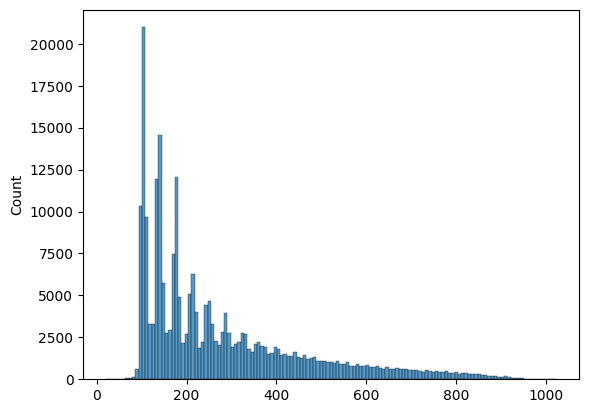

In [51]:
sns.histplot(correct_answer['generated_token_counts'])

<Axes: ylabel='Count'>

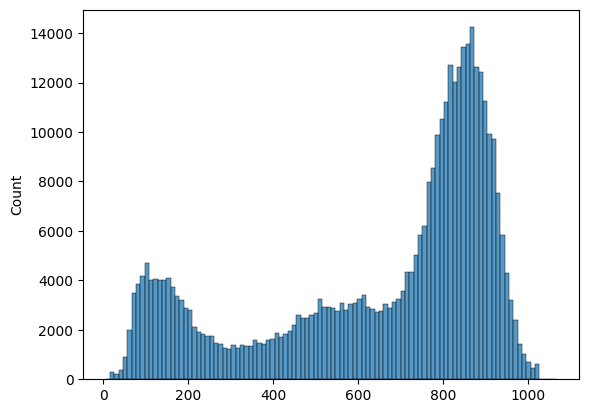

In [54]:
sns.histplot(correct_format['generated_token_counts'])